<a href="https://colab.research.google.com/github/shubhampareek1211/machinelearning/blob/main/bank_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/bank-additional-full.csv",sep=";")
dataframe = data.copy()
dataframe.head((10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
## mapping some of the column values
mapping = {
    "blue-collar": "BlueCollar",
    "housemaid": "BlueCollar",
    "technician": "BlueCollar",
    "services": "WhiteCollar",
    "admin.": "WhiteCollar",
    "management": "WhiteCollar",
    "unemployed": "NotWorking",
    "student": "NotWorking",
    "entrepreneur": "Entrepreneur",
    "self-employed": "Entrepreneur"
}

dataframe["job_category"] = dataframe["job"].map(mapping).fillna("Others")

In [ ]:
dataframe.head()
dataframe["education"].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [ ]:
mapp= {
    "university.degree": "University",
    "high.school": "HighSchool",
    "basic.9y": "basicSchool",
    "basic.4y": "basicSchool",
    "basic.6y": "basicSchool",
    "professional.course": "Professional",
    "illiterate" : "Illiterate",
}
dataframe["education"] = dataframe["education"].map(mapp).fillna("Unknown")

In [ ]:
# changing the binary values of the default, housing and loan to 0/1 from yes or no
binary_columns = ["default","housing","loan",'y']
for idx in binary_columns:
    dataframe[idx] = dataframe[idx].map({"yes":1 ,"no":0})
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_category
0,56,housemaid,married,basicSchool,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,BlueCollar
1,57,services,married,HighSchool,NaN,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
2,37,services,married,HighSchool,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
3,40,admin.,married,basicSchool,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
4,56,services,married,HighSchool,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar


In [ ]:
# dataframe["default"].value_counts() 99.99 percent of the values are NAN or 0 we can drop it
#dataframe["contact"].value_counts() # can be converted into 0 and 1 as only 2 values are there


In [ ]:
# converting contact to numerical value
dataframe["contact"] = dataframe["contact"].map({"telephone":1, "cellular":0})


In [ ]:
# creating age based feature

def life_age(age):
    if age < 18:
        return "young"
    elif age <35:
        return "early_carrier"
    elif age <50:
        return "mid_carrier"
    elif age < 65:
        return "pre_retirement"
    else:
        return "retirement"

dataframe["age"] = dataframe["age"].apply(life_age)


In [ ]:
#education order ; illiterate:0, basicSchool: 1 and so on

order_education = {
    "basicSchool": 1,
    "HighSchool": 2,
    "Professional": 3,
    "Unknown": 0,
    "University": 4,
    "Illiterate": -1
}
dataframe["education"] = dataframe["education"].map(order_education)

In [ ]:
def pdays_recency(pdays):
    if pdays == -1:
        return 'never'
    elif pdays < 7:
        return 'very_recent'
    elif pdays < 30:
        return 'recent'
    elif pdays < 90:
        return 'moderate'
    else:
        return 'old'

dataframe['pdays'] = dataframe['pdays'].apply(pdays_recency)

In [ ]:
#df_copy.head()
# putting the call duration bin ; taking random grouping
#df_copy["call_duration"] = df_copy[duration]/60
#df_copy['short_calls'] = (df_copy['duration']< 180).astype(int)
#df_copy['long_calls'] = (df_copy['duration']>=180).astype(int)


In [ ]:
# month mapping
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
dataframe['month'] = dataframe['month'].map(month_map)
day_map = {
    'mon': 1, 'tue': 2, 'wed':3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}
dataframe['day_of_week'] = dataframe['day_of_week'].map(day_map)
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_category
0,pre_retirement,housemaid,married,1,0.0,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,BlueCollar
1,pre_retirement,services,married,2,NaN,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
2,mid_carrier,services,married,2,0.0,1.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
3,mid_carrier,admin.,married,1,0.0,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
4,pre_retirement,services,married,2,0.0,0.0,1.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar


In [ ]:
dataframe["duration"]= (dataframe['duration']/60).astype(int)
#df_copy['short_calls'] = (df_copy['duration']< 180).astype(int)
#df_copy['long_calls'] = (df_copy['duration']>=180).astype(int)

In [ ]:
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_category
0,pre_retirement,housemaid,married,1,0.0,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,BlueCollar
1,pre_retirement,services,married,2,NaN,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
2,mid_carrier,services,married,2,0.0,1.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
3,mid_carrier,admin.,married,1,0.0,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar
4,pre_retirement,services,married,2,0.0,0.0,1.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,WhiteCollar


In [ ]:
# Dropping the most collinear (nr.employed)
dataframe.drop(columns=["nr.employed"], inplace=True, errors='ignore')

# Composite economic stability index
dataframe["economic_stability"] = (
    dataframe["emp.var.rate"].rank(pct=True)
    - dataframe["cons.conf.idx"].rank(pct=True)
    - dataframe["cons.price.idx"].rank(pct=True)
    - dataframe["euribor3m"].rank(pct=True)
)


In [ ]:
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,job_category,economic_stability
0,pre_retirement,housemaid,married,1,0.0,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,0,BlueCollar,-1.470732
1,pre_retirement,services,married,2,NaN,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732
2,mid_carrier,services,married,2,0.0,1.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732
3,mid_carrier,admin.,married,1,0.0,0.0,0.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732
4,pre_retirement,services,married,2,0.0,0.0,1.0,1,5,1,...,old,0,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732


In [ ]:
# combining total contact into one that is beavioural indicator -> campaign and previous indicator
dataframe["total_contacts"] = dataframe["campaign"] + dataframe["previous"]

In [ ]:
# combining housing and loan as together because having loan might decrease the chances of getting loan taking OR between them
dataframe["has_any_loan"] = ((dataframe["housing"] == 1) | (dataframe["loan"] == 1)).astype(int)
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,job_category,economic_stability,total_contacts,has_any_loan
0,pre_retirement,housemaid,married,1,0.0,0.0,0.0,1,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,0,BlueCollar,-1.470732,1,0
1,pre_retirement,services,married,2,NaN,0.0,0.0,1,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732,1,0
2,mid_carrier,services,married,2,0.0,1.0,0.0,1,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732,1,1
3,mid_carrier,admin.,married,1,0.0,0.0,0.0,1,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732,1,0
4,pre_retirement,services,married,2,0.0,0.0,1.0,1,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,0,WhiteCollar,-1.470732,1,1


In [ ]:
#df_newcopy2["poutcome"].value_counts()
# high chance that previous successs would result in a positive outcome
dataframe["previous_success"] = (dataframe["poutcome"] == "success").astype(int)


In [ ]:
# assigning 0 to old that not contacted before (999) and contacted as 1 for very_recent and recent
# preivous customer might subscribe again ; likeley outcome
dataframe["was_contacted_before"] = np.where(dataframe["pdays"] == "old", 0, 1)


In [ ]:
# encoding categorical values
# --- Ordinal encode age (life stage) ---
age_order = {'young': 0, 'early_carrier': 1, 'mid_carrier': 2, 'pre_retirement': 3, 'retirement': 4}
dataframe['age'] = dataframe['age'].map(age_order)
dataframe['marital'] = dataframe['marital'].map({'married': 3, 'single': 2, 'divorced': 0,'unknown':1})
dataframe['pdays'] = dataframe['pdays'].map({'old':0, 'very_recent':1, 'recent':2})
dataframe['poutcome'] = dataframe['poutcome'].map({'success': 1, 'failure': 0, 'nonexistent': 2})





In [ ]:
dataframe.drop(columns=["job"], inplace=True, errors='ignore')

In [ ]:
dataframe['job_category'] = dataframe['job_category'].map({'BlueCollar': 0, 'WhiteCollar': 1,'Entrepreneur': 2,'Others': 3,'NotWorking': 4})
dataframe.head()


,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,cons.price.idx,cons.conf.idx,euribor3m,y,job_category,economic_stability,total_contacts,has_any_loan,previous_success,was_contacted_before
0,3,3,1,0.0,0.0,0.0,1,5,1,4,...,93.994,-36.4,4.857,0,0,-1.470732,1,0,0,0
1,3,3,2,NaN,0.0,0.0,1,5,1,2,...,93.994,-36.4,4.857,0,1,-1.470732,1,0,0,0
2,2,3,2,0.0,1.0,0.0,1,5,1,3,...,93.994,-36.4,4.857,0,1,-1.470732,1,1,0,0
3,2,3,1,0.0,0.0,0.0,1,5,1,2,...,93.994,-36.4,4.857,0,1,-1.470732,1,0,0,0
4,3,3,2,0.0,0.0,1.0,1,5,1,5,...,93.994,-36.4,4.857,0,1,-1.470732,1,1,0,0


In [ ]:
dataframe['y'].isna().sum()
dataframe['y'] = dataframe['y'].fillna(0)  # or 1, depending on meaning

In [ ]:
dataframe['default'] = dataframe['default'].fillna(dataframe['default'].mode()[0])

In [ ]:
dataframe['housing'] = dataframe['housing'].fillna(dataframe['housing'].mode()[0])
dataframe['loan'] = dataframe['loan'].fillna(dataframe['loan'].mode()[0])


In [ ]:
dataframe.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,cons.price.idx,cons.conf.idx,euribor3m,y,job_category,economic_stability,total_contacts,has_any_loan,previous_success,was_contacted_before
0,3,3,1,0.0,0.0,0.0,1,5,1,4,...,93.994,-36.4,4.857,0,0,-1.470732,1,0,0,0
1,3,3,2,0.0,0.0,0.0,1,5,1,2,...,93.994,-36.4,4.857,0,1,-1.470732,1,0,0,0
2,2,3,2,0.0,1.0,0.0,1,5,1,3,...,93.994,-36.4,4.857,0,1,-1.470732,1,1,0,0
3,2,3,1,0.0,0.0,0.0,1,5,1,2,...,93.994,-36.4,4.857,0,1,-1.470732,1,0,0,0
4,3,3,2,0.0,0.0,1.0,1,5,1,5,...,93.994,-36.4,4.857,0,1,-1.470732,1,1,0,0


In [ ]:
df = dataframe
# dropping the index column
X = df.drop(columns=['y', '""'], errors='ignore')
y = df['y']

# Split into training/testing
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(28831, 24)
(6178, 24)
(6179, 24)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
y_test_pred = clf.predict(X_test)
print("initial_training_accuracy", accuracy_score(y_train, y_train_pred))
print("initial_test_accuracy", accuracy_score(y_test, y_test_pred))
print("initial validation accuracy", accuracy_score(y_val, y_val_pred))

initial_training_accuracy 0.998924768478374
initial_test_accuracy 0.8818579058100016
initial validation accuracy 0.8913887989640661


In [ ]:
print(y_train.isna().sum(), y_val.isna().sum(), y_test.isna().sum())
print(X_train.isna().sum(),X_val.isna().sum(),X_test.isna().sum())

0 0 0
age                     0
marital                 0
education               0
default                 0
housing                 0
loan                    0
contact                 0
month                   0
day_of_week             0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
job_category            0
economic_stability      0
total_contacts          0
has_any_loan            0
previous_success        0
was_contacted_before    0
dtype: int64 age                     0
marital                 0
education               0
default                 0
housing                 0
loan                    0
contact                 0
month                   0
day_of_week             0
duration                0
campaign                0
pdays                   0
previous                0
poutcome           

In [ ]:
# tuning the hyperparameter of the decision tree
max_depth_values = [2,3,4,5,6,8,10,12,15,None]
min_sample_split_values = [2,5,10,20]
ccp_alpha_values = [0,0.001,0.005,0.01,0.05]

result = []

# GRID SEARCH MAUALLY
for depth in max_depth_values:
    for min_split in min_sample_split_values:
        for alpha in ccp_alpha_values:
            clf = DecisionTreeClassifier(
                criterion='gini',
                max_depth=depth,
                min_samples_split=min_split,
                ccp_alpha=alpha,
            )
            clf.fit(X_train,y_train)

            training_accuracy = accuracy_score(y_train,y_train_pred)
            val_accuracy = accuracy_score(y_val,y_val_pred)

            result.append({
                'max_depth': depth,
                'min_samples_split': min_split,
                'ccp_alpha': alpha,
                'train_accuracy': training_accuracy,
                'val_accuracy': val_accuracy,
            })
# converting the result back into the dataframe

result_df = pd.DataFrame(result)
best_params = result_df.loc[result_df['val_accuracy'].idxmax()]
print(best_params)


max_depth            2.000000
min_samples_split    2.000000
ccp_alpha            0.000000
train_accuracy       0.998925
val_accuracy         0.889123
Name: 0, dtype: float64


In [ ]:
best_depth = int(best_params['max_depth'])
best_split = int(best_params['min_samples_split'])
best_alpha = float(best_params['ccp_alpha'])

final_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_depth,
    min_samples_split=best_split,
    ccp_alpha=best_alpha,
    random_state=42
)

# Combine training + validation data for stronger final model
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])

final_clf.fit(X_trainval, y_trainval)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test_pred = final_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy: {test_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Final Test Accuracy: 0.8997

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5483
           1       0.59      0.34      0.44       696

    accuracy                           0.90      6179
   macro avg       0.76      0.66      0.69      6179
weighted avg       0.88      0.90      0.89      6179


Confusion Matrix:
 [[5320  163]
 [ 457  239]]


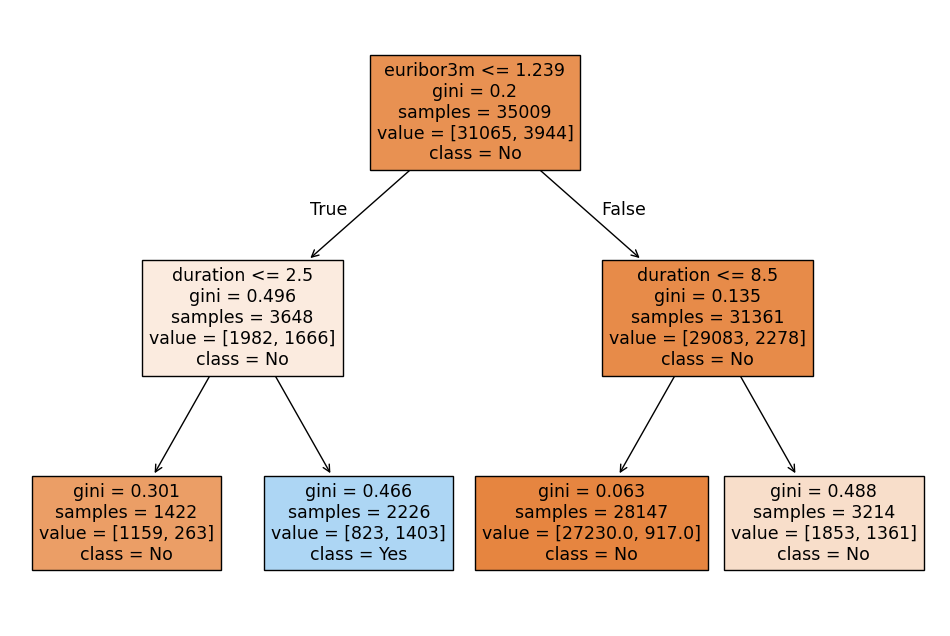

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(final_clf, filled=True, feature_names=X.columns, class_names=['No','Yes'])
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [2,3,4,5,6,8,10,None],
    'min_samples_split': [2,5,10,20],
    'ccp_alpha': [0,0.001,0.005,0.01,0.05]
}
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=1,
    verbose=2,
)
grid_search.fit(X_trainval, y_trainval)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-val Accuracy:", grid_search.best_score_)



Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ......ccp_alpha=0, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END .....ccp_alpha=0, max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END .....ccp_alpha=0, max_depth=2, min_sa

In [ ]:
# evaluation grid_search on the test data
best_dt = grid_search.best_estimator_
y_test_pred = best_dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))



Test Accuracy: 0.9103414792037546
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5483
           1       0.64      0.47      0.54       696

    accuracy                           0.91      6179
   macro avg       0.79      0.72      0.75      6179
weighted avg       0.90      0.91      0.90      6179

[[5298  185]
 [ 369  327]]


<function matplotlib.pyplot.show(close=None, block=None)>

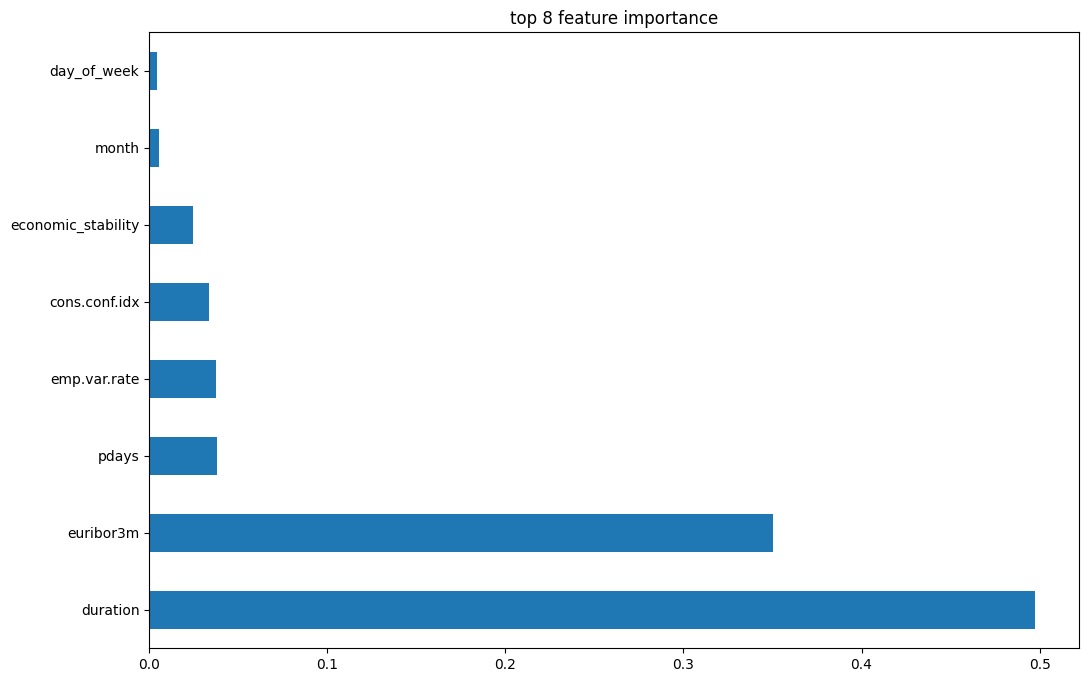

In [ ]:
# feature importance plot
feature_importance = pd.Series(best_dt.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance.head(8).plot(kind="barh", figsize=(12,8))
plt.title("top 8 feature importance")
plt.show

In [ ]:
#baseline random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


rf_grid = {
    "n_estimators": randint(200,400),
    "max_depth": [None,8,12],
    "min_samples_split": randint(2,10),
    "max_features": ["sqrt",0.5]
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_cv = RandomizedSearchCV(
          rf,
          param_distributions=rf_grid,
          n_iter=15,
          cv=3,
          scoring='accuracy',
          random_state=42,
          n_jobs=-1,
          verbose =2,
          )
rf_cv.fit(X_trainval, y_trainval)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [None, 8, 12],
                                        'max_features': ['sqrt', 0.5],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bf312473d40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bf3124afa70>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", rf_cv.best_params_)
print("best cross-validation accuracy", rf_cv.best_score_)

# on the test data set
best_rf = rf_cv.best_estimator_
test_accuracy = best_rf.score(X_test,y_test)
print("test accuracy:", test_accuracy)

Best Parameters: {'max_depth': 12, 'max_features': 0.5, 'min_samples_split': 4, 'n_estimators': 274}
best cross-validation accuracy 0.914650572150229
test accuracy: 0.9148729567891245



Top 10 Important Features:
duration                0.348207
euribor3m               0.201423
economic_stability      0.064536
pdays                   0.036521
was_contacted_before    0.030979
emp.var.rate            0.028996
education               0.028131
day_of_week             0.028062
job_category            0.026723
total_contacts          0.025783
dtype: float64


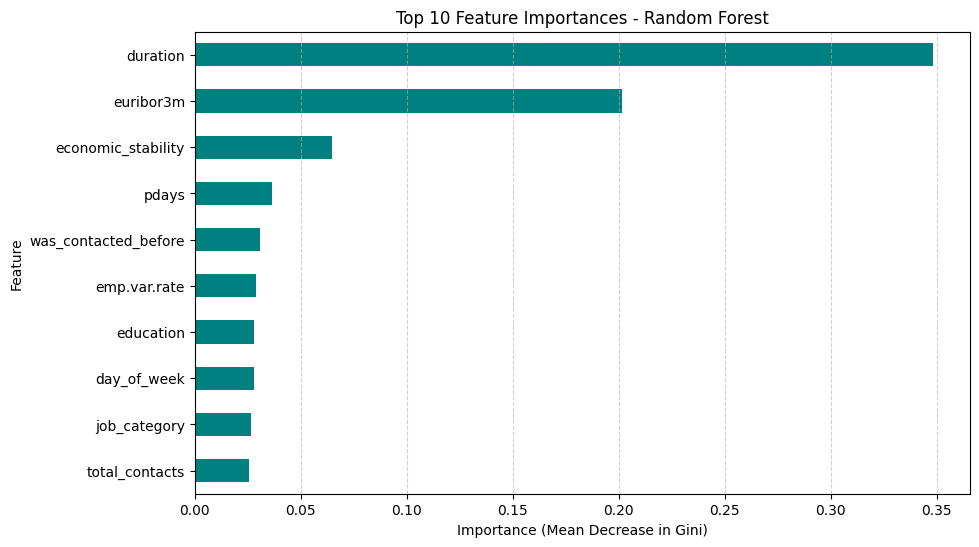

In [ ]:
# the best feature
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Get feature importances from the best model
importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# 2️⃣ Sort values (highest = most important)
importances = importances.sort_values(ascending=False)

# 3️⃣ Display the top features
print("\nTop 10 Important Features:")
print(importances.head(10))

# 4️⃣ Plot a bar chart for visualization
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance (Mean Decrease in Gini)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest importance at top
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values before fitting
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_trainval_imputed = imputer.fit_transform(X_trainval)


gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05,0.1,0.3],
    'n_estimators': [100,300,500],
    'max_depth': [2,3,4],
    'subsample': [0.6,0.8,1.0]
}

gb_cv = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
)

gb_cv.fit(X_trainval_imputed,y_trainval)

# evaluating the model

best_gb = gb_cv.best_estimator_
print("Best Parameter:", gb_cv.best_params_)
print("Best cross-validation:", gb_cv.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameter: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
Best cross-validation: 0.9162787934517395


In [ ]:
# result on the test data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, precision_recall_curve, auc, classification_report

y_pred = best_gb.predict(X_test)
y_prob = best_gb.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
auc_pr = auc(recalls, precisions)

print("The GradientBoosting key Metrics:")
print("test accuracy:", test_acc)

print("Accuracy:", acc)
print("Pecission:", prec)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUPCR:", auc_pr)


The GradientBoosting key Metrics:
test accuracy: 0.8996601391810972
Accuracy: 0.9202136268004532
Pecission: 0.6746987951807228
Recall: 0.5632183908045977
F1 Score: 0.6139389193422083
AUPCR: 0.6672763408036799


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


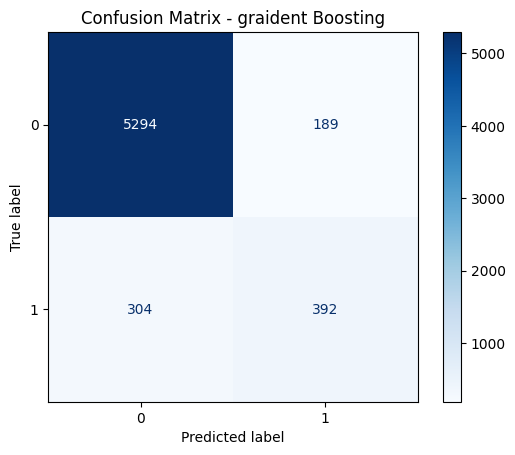

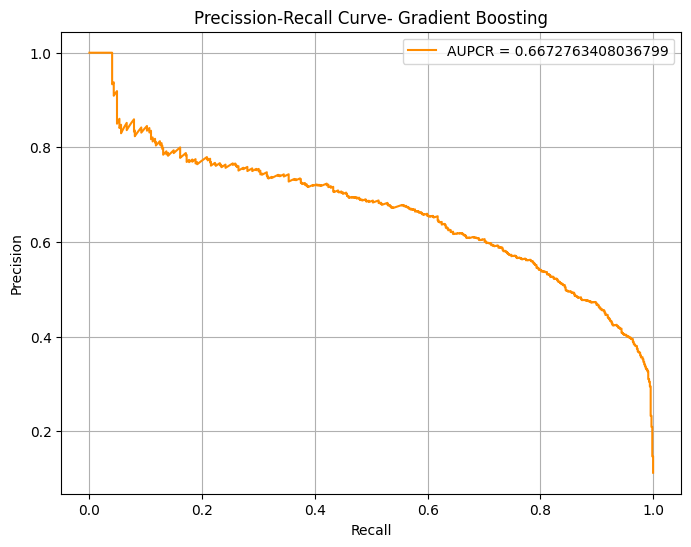

NameError: name 'feat_imp' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format ="d")
plt.title("Confusion Matrix - graident Boosting")
plt.show()

## Precision - Recal Curve

plt.figure(figsize=(8,6))
plt.plot(recalls,precisions,label=f"AUPCR = {auc_pr}", color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precission-Recall Curve- Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
importances = pd.Series(best_gb.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh', color='darkorange')
plt.title("Top 10 Feature Importances – Gradient Boosting")
plt.xlabel("Importance (Mean Decrease in Impurity)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# plotting learning curve for overfitting for analysis
n_estimators_range = [100, 200, 300, 400, 600]
train_acc, val_acc = [], []

for n in n_estimators_range:
    gb_temp = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=best_gb.learning_rate,
        max_depth=best_gb.max_depth,
        subsample=best_gb.subsample,
        random_state=42
    )
    gb_temp.fit(X_train, y_train)
    train_acc.append(gb_temp.score(X_train, y_train))
    val_acc.append(gb_temp.score(X_val, y_val))

plt.figure(figsize=(10,6))
plt.plot(n_estimators_range, train_acc, marker='o', label='Training Accuracy')
plt.plot(n_estimators_range, val_acc, marker='s', label='Validation Accuracy')
plt.title("Learning Curve: Effect of n_estimators on Overfitting")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Decision Tree vs. Gradient Boosting — discussion (based on  numbers)

Accuracy: DT ≈ 0.910 → GB = 0.919 (+0.9 pp)

Recall (class 1): DT ≈ 0.47 → GB = 0.552 (+8–10 pp). This is the big win: GB recovers more true “yes”s.

Precision (class 1): DT ≈ 0.64 → GB = 0.67 (slight uptick).

F1: DT ≈ 0.54 → GB = 0.61 (+7 pp).

AUCPR: DT typically lower; GB = 0.655 (better ranking for positive class).

Why: a single DT is high-variance and greedy; GBM builds many shallow trees sequentially, each correcting the previous model’s residuals. That reduces bias while using shrinkage/early stopping/subsampling to control variance—hence the better recall/F1 without blowing up false positives.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


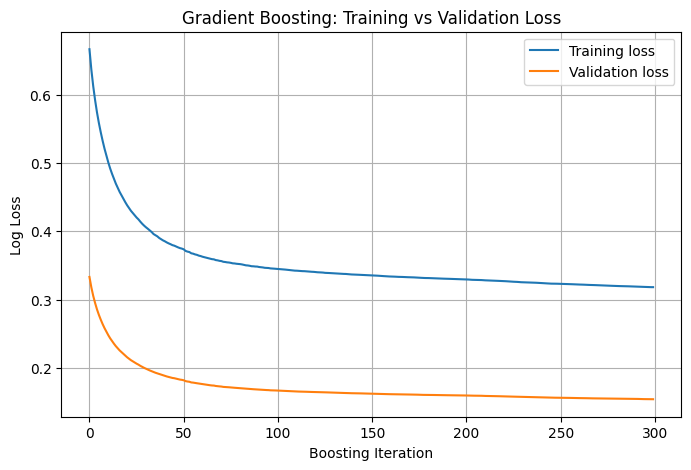

In [ ]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# training loss per stage (deviance/log-loss). Available after fit:
train_loss = np.array(getattr(best_gb, "train_score_", []))  # length = n_estimators

# validation loss per stage via staged probabilities
val_loss = []
for proba in best_gb.staged_predict_proba(X_val):
    val_loss.append(log_loss(y_val, proba[:, 1]))
val_loss = np.array(val_loss)

plt.figure(figsize=(8,5))
plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.xlabel("Boosting Iteration")
plt.ylabel("Log Loss")
plt.title("Gradient Boosting: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


   learning_rate  train_acc   val_acc  val_aupr
0           0.01   0.917381  0.916154  0.685101
1           0.10   0.937637  0.921010  0.686363
2           0.30   0.958378  0.916963  0.661268


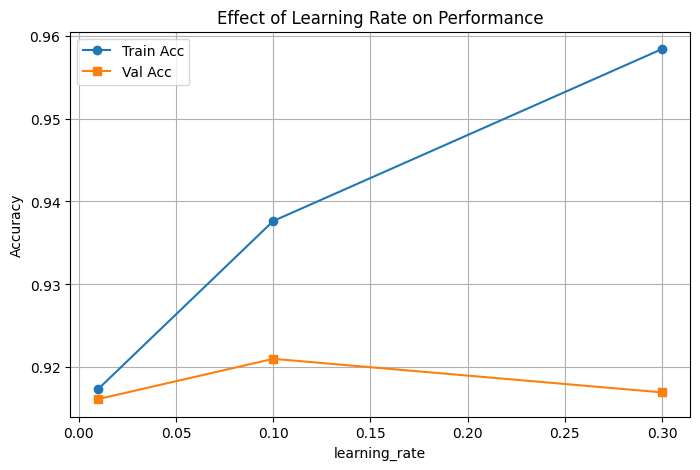

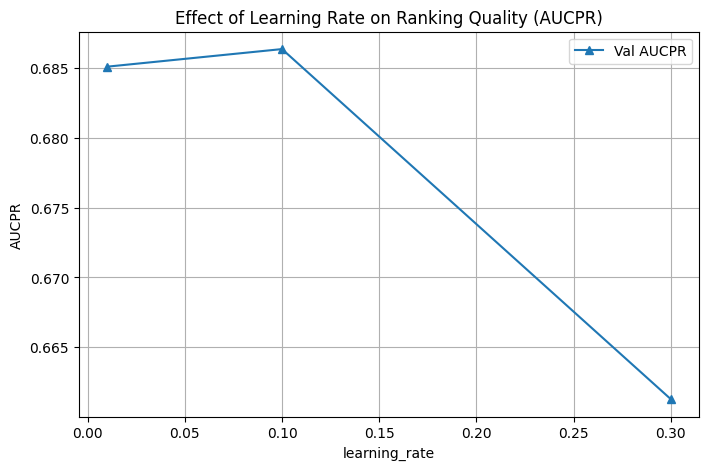

In [ ]:
from sklearn.metrics import accuracy_score, average_precision_score

lrs = [0.01, 0.1, 0.3]
n_estim = best_gb.n_estimators
max_depth = best_gb.max_depth
subsample = best_gb.subsample

rows = []
for lr in lrs:
    gb_tmp = GradientBoostingClassifier(
        learning_rate=lr,
        n_estimators=n_estim,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )
    gb_tmp.fit(X_train, y_train)
    tr_acc = gb_tmp.score(X_train, y_train)
    val_acc = gb_tmp.score(X_val, y_val)
    val_aupr = average_precision_score(y_val, gb_tmp.predict_proba(X_val)[:,1])
    rows.append((lr, tr_acc, val_acc, val_aupr))

# table + plot
import pandas as pd
df_lr = pd.DataFrame(rows, columns=["learning_rate","train_acc","val_acc","val_aupr"]).sort_values("learning_rate")
print(df_lr)

plt.figure(figsize=(8,5))
plt.plot(df_lr["learning_rate"], df_lr["train_acc"], marker='o', label="Train Acc")
plt.plot(df_lr["learning_rate"], df_lr["val_acc"], marker='s', label="Val Acc")
plt.title("Effect of Learning Rate on Performance")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(8,5))
plt.plot(df_lr["learning_rate"], df_lr["val_aupr"], marker='^', label="Val AUCPR")
plt.title("Effect of Learning Rate on Ranking Quality (AUCPR)")
plt.xlabel("learning_rate")
plt.ylabel("AUCPR")
plt.legend(); plt.grid(True); plt.show()


lr=0.01 → smoother, underfits unless you raise n_estimators.

lr=0.1 → common sweet spot

lr=0.3 → learns fast; may spike train acc and hurt validation if too aggressive.

a) Why boosting improves generalization

Builds a sequence of weak learners where each tree focuses on previous errors.

Shrinkage (learning_rate) + subsample act as strong regularizers.

Final model is a sum of many simple trees, yielding lower bias than a DT and lower variance than a deep tree.

b) Bias–variance trade-off (in your plots)

Low n_estimators / small depth / low lr → underfit (high bias); both train & val lower.

Huge n_estimators or high lr → training ↑, val plateaus or drops → overfit (high variance).

Your curves show the sweet spot around 300–400 trees with lr ~ 0.05–0.1.

c) Computational cost & interpretability

Cost: GBM > RF > DT. Training is sequential; tuning is slower.

Interpretability: single DT is best (plot the tree). GBM is less interpretable; rely on feature importance, partial dependence (optional), and SHAP if needed.

d) Feature importance & predictions

Your top features (duration, euribor3m, pdays, macro indices) align with domain intuition: call engagement + economic climate matter most.

This helps justify decisions: e.g., prioritize longer engagement or target windows when interest rates are favorable.

XGBOOST - Training and Evaluation

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier, plot_importance
import seaborn as sns

# parameter grid tuning

xgb = XGBClassifier(
    random_state=42,
    eval_metric = 'logloss',
    use_label_encoder = False
)

param_grid = {
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [8,10,12],
    'n_estimators' : [100,300,600],
    'subsample' : [0.5,0.8,1.0],
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,n_jobs=-1,cv=3,scoring='accuracy', verbose=2)
grid_xgb.fit(X_trainval, y_trainval)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:25:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [100, 300, 600],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
#Model selection - Best and accuracy Evaluation

best_xgb = grid_xgb.best_estimator_
print("Best Parameters:", grid_xgb.best_params_)
print("Best CV Accuracy:", grid_xgb.best_score_)

# Test Set Evluation
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
auc_pr = auc(recalls, precisions)

print("Test accuracy", acc)
print("Precision", prec)
print("Recall", rec)
print("F1 Scoer", f1)
print("AUCPR", auc_pr)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.9158502710034563
Test accuracy 0.9179478880077683
Precision 0.656198347107438
Recall 0.5704022988505747
F1 Scoer 0.6102997694081476
AUCPR 0.6524950124261754


In [ ]:
# Confusion Matrix + Precision-Recall Curve

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples",value_format="d")
plt.title("Confusion Matrix - XGBoost")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(recalls,precisions,color="teal", label="AUPCR = {auc_pr}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve- XGBoost")
plt.legend()
plt.grid(True)
plt.show()




<Figure size 800x600 with 0 Axes>

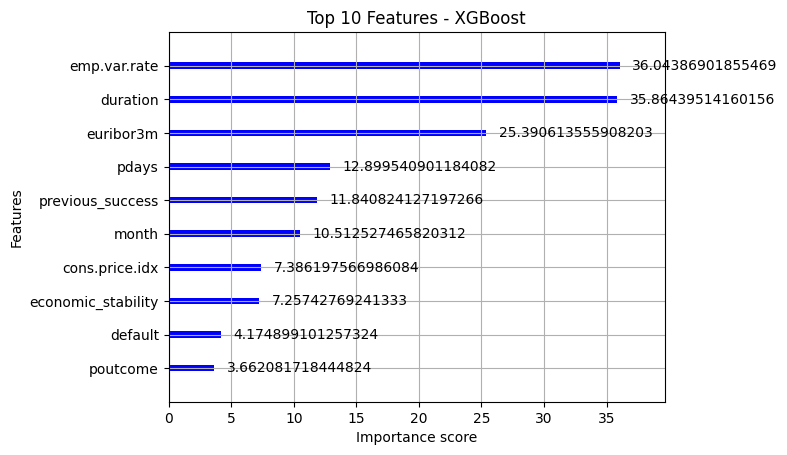

In [ ]:
#Best feature

plt.figure(figsize=(8,6))
plot_importance(best_xgb,max_num_features=10, importance_type ="gain", color="blue")
plt.title("Top 10 Features - XGBoost")
plt.show()

Visualising the Training vs Validation Loss (with eval_set + early stopping)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:27:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


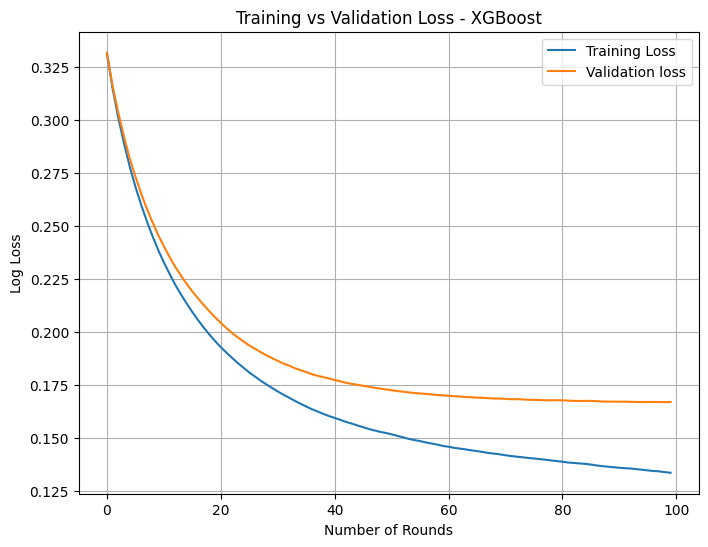

In [ ]:
from xgboost import XGBClassifier
#from xgboost.callback import EarlyStopping # Removed
import matplotlib.pyplot as plt

xgb_eval = XGBClassifier(**grid_xgb.best_params_, random_state=42,eval_metric='logloss',use_label_encoder=False)

eval_set = [(X_train,y_train),(X_val,y_val)]

# Define the early stopping callback # Removed
#early_stopping = EarlyStopping( # Removed
#    rounds=10, # number of rounds to stop early if no improvement # Removed
#    metric_name='validation_1-logloss', # metric to monitor # Removed
#    data_name='validation_1' # dataset to monitor # Removed
#) # Removed


xgb_eval.fit(
    X_train,y_train,
    eval_set=eval_set,
    verbose=False,
    #callbacks=[early_stopping] # Removed
)

# Plot learning curve for log loss

results = xgb_eval.evals_result()

plt.figure(figsize=(8,6))
plt.plot(results['validation_0']['logloss'], label='Training Loss')
plt.plot(results['validation_1']['logloss'],label="Validation loss")
plt.xlabel("Number of Rounds")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# EFfect of Learning Rate and Tree Depth (Bias-Variance Analysis)

learning_rate = [0.01,0.05,0.1,0.3]
max_depth = [2,4,6]
train_acc, val_acc = [], []

for lr in learning_rate:
    xgb_temp = XGBClassifier(learning_rate=lr,
                             n_estimators=100,
                             max_depth = 8,
                             subsample=0.8,
                             random_state=42,
                             eval_metric='logloss',
                             use_label_encoder = False)

    xgb_temp.fit(X_train,y_train)
    train_acc.append(xgb_temp.score(X_train, y_train))
    val_acc.append(xgb_temp.score(X_val, y_val))

plt.figure(figsize=(8,6))
plt.plot(learning_rate,train_acc, marker='o',label = "Training Accuracy")
plt.plot(learning_rate,val_acc,market='x', label="Validation Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title('Effect of the learning rate on Bias and Variance')
plt.legend()
plt.grid(True)
plt.show()

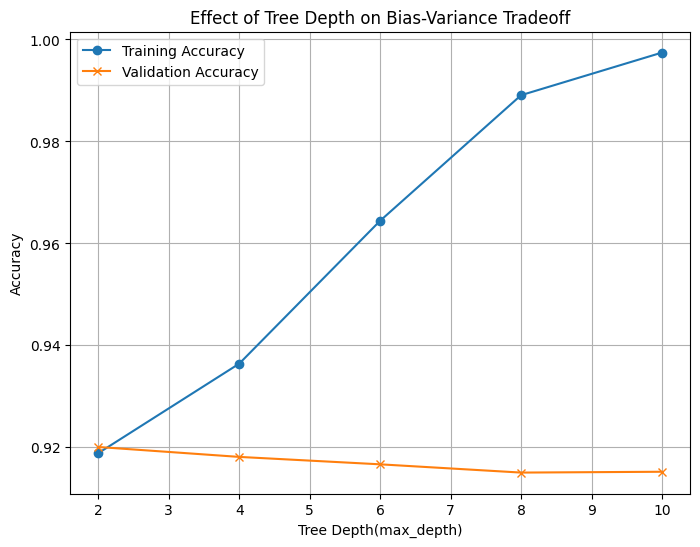

In [ ]:
#Simillary for the tree depth
max_depths = [2,4,6,8,10]
train_acc, val_acc = [], []

for d in max_depths:
    xgb_temp = XGBClassifier(learning_rate=0.1,n_estimators=300,max_depth=d,subsample=0.8,random_state=42,eval_metric="logloss")

    xgb_temp.fit(X_train,y_train)
    train_acc.append(xgb_temp.score(X_train, y_train))
    val_acc.append(xgb_temp.score(X_val, y_val))

plt.figure(figsize=(8,6))
plt.plot(max_depths, train_acc, marker='o',label = "Training Accuracy")
plt.plot(max_depths, val_acc, marker="x", label="Validation Accuracy")
plt.xlabel("Tree Depth(max_depth)")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()